# Setup

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import Activation, Dense
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt


In [290]:
from datetime import datetime

def toDate(ts):
    return datetime.fromtimestamp(float(ts)).date()

np.random.seed(7)

# Load the data

In [291]:
rawData = pd.read_csv("~/data/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv", parse_dates=True, date_parser=toDate, index_col="Timestamp")

## Check data quality

In [305]:
# Count nulls
for col in rawData.columns:
    print(rawData[col].isna().sum())

0
0
0
0
0
0
0


In [307]:
df = rawData
df.index.names = ["Date"]
df['Volume'] = pd.to_numeric(df['Volume_(Currency)'])

df.shape
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volume
Date,,,,,,,,
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00
2014-12-01,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,3.000000e+00


In [332]:
# Do we have all days?
expected_dates = pd.period_range(min(df.index.values), max(df.index.values))

Period('2014-12-02', 'D')

In [383]:
i = 0
j = 0

A = df.index.values
B = expected_dates

while (i < A.shape[0] and j < B.shape[0]):
    date1 = pd.to_datetime(A[i]).date()
    date2 = B[j].to_timestamp().date()
    if (date1 == date2):
        i += 1
        j += 1
    elif (date1 < date2):
        i += 1
    else:
        print("Missing " + str(date1) + " " + str(date2))
        j += 1

Missing 2014-12-06 2014-12-05
Missing 2014-12-08 2014-12-07
Missing 2014-12-10 2014-12-09
Missing 2014-12-12 2014-12-11
Missing 2014-12-18 2014-12-13
Missing 2014-12-18 2014-12-14
Missing 2014-12-18 2014-12-15
Missing 2014-12-18 2014-12-16
Missing 2014-12-18 2014-12-17
Missing 2015-01-08 2014-12-19
Missing 2015-01-08 2014-12-20
Missing 2015-01-08 2014-12-21
Missing 2015-01-08 2014-12-22
Missing 2015-01-08 2014-12-23
Missing 2015-01-08 2014-12-24
Missing 2015-01-08 2014-12-25
Missing 2015-01-08 2014-12-26
Missing 2015-01-08 2014-12-27
Missing 2015-01-08 2014-12-28
Missing 2015-01-08 2014-12-29
Missing 2015-01-08 2014-12-30
Missing 2015-01-08 2014-12-31
Missing 2015-01-08 2015-01-01
Missing 2015-01-08 2015-01-02
Missing 2015-01-08 2015-01-03
Missing 2015-01-08 2015-01-04
Missing 2015-01-08 2015-01-05
Missing 2015-01-08 2015-01-06
Missing 2015-01-08 2015-01-07
Missing 2015-01-13 2015-01-09
Missing 2015-01-13 2015-01-10
Missing 2015-01-13 2015-01-11
Missing 2015-01-13 2015-01-12
Missing 20

In [401]:
df["Close"].max(axis = 0)

19891.99

# Preprocess the data

In [384]:
historical_prices = df.resample('1D').agg({'Open': 'first', 
                                 'High': 'max', 
                                 'Low': 'min', 
                                 'Close': 'last',
                                 'Volume': 'sum'}).dropna()
historical_prices = historical_prices[['Close', 'Volume']]

number_of_days = historical_prices.shape[0]
print(number_of_days)

historical_prices.shape

1271


(1271, 2)

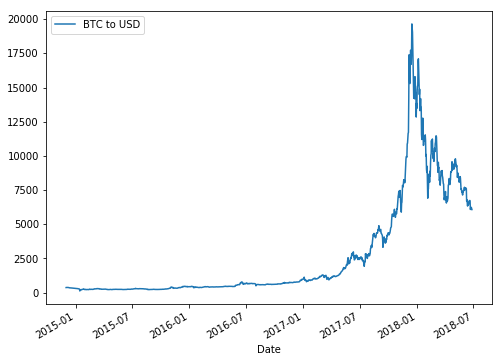

In [391]:
historical_prices.reset_index().plot(x="Date", y="Close", figsize=(8, 6), label="BTC to USD")

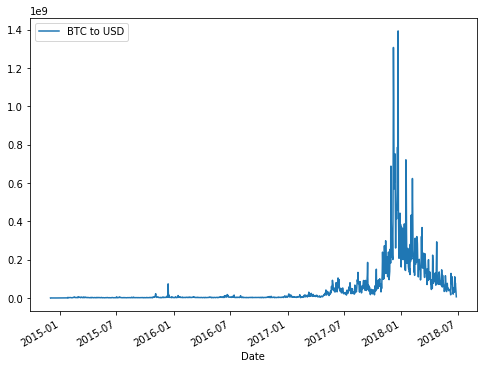

In [392]:
historical_prices.reset_index().plot(x="Date", y="Volume", figsize=(8, 6), label="BTC to USD")

# Split the dataset into training and testing set

In [402]:
test_split_point = int(number_of_days * 0.8)
train = historical_prices[:test_split_point]
test = historical_prices[test_split_point:]

In [403]:
train.shape

(1016, 2)

In [404]:
test.shape

(255, 2)

# Prepare training and testing model

In [479]:
def prepareInputAndOutput(dataset, window_len, norm_cols):
    inputs = []
    for i in range(len(dataset)-window_len):
        temp_set = dataset[i:(i+window_len)].copy()
        for col in norm_cols:
            temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1    
        inputs.append(temp_set)
        
    outputs = (dataset['Close'][window_len:].values/dataset['Close'][:-window_len].values)-1
    
    inputs = [np.array(inputs) for inputs in inputs]
    inputs = np.array(inputs)

    return (inputs, outputs)

# Choose parameters

In [525]:
window_len = 10
norm_cols = ["Close", "Volume"]
batch_size = 1
epochs = 30

# Train model

In [526]:
LSTM_training_inputs, LSTM_training_outputs = prepareInputAndOutput(train, window_len, norm_cols)

In [ ]:
model = Sequential()

model.add(LSTM(20, input_shape=(LSTM_training_inputs.shape[1], LSTM_training_inputs.shape[2])))
model.add(Dropout(0.25))
model.add(Dense(units=1))
model.add(Activation("linear"))

model.compile(loss="mae", optimizer="adam")

In [ ]:
model.fit(LSTM_training_inputs, LSTM_training_outputs, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/30
 - 14s - loss: 0.0575
Epoch 2/30
 - 13s - loss: 0.0407
Epoch 3/30
 - 13s - loss: 0.0355
Epoch 4/30
 - 14s - loss: 0.0343
Epoch 5/30
 - 14s - loss: 0.0331
Epoch 6/30
 - 13s - loss: 0.0324
Epoch 7/30
 - 13s - loss: 0.0326
Epoch 8/30
 - 13s - loss: 0.0313
Epoch 9/30
 - 13s - loss: 0.0316
Epoch 10/30
 - 13s - loss: 0.0310
Epoch 11/30
 - 13s - loss: 0.0294
Epoch 12/30
 - 13s - loss: 0.0301
Epoch 13/30
 - 13s - loss: 0.0288
Epoch 14/30
 - 13s - loss: 0.0286
Epoch 15/30
 - 13s - loss: 0.0286
Epoch 16/30
 - 13s - loss: 0.0302
Epoch 17/30
 - 13s - loss: 0.0282
Epoch 18/30


# Test model

In [ ]:
LSTM_test_inputs, LSTM_test_outputs = prepareInputAndOutput(test, window_len, norm_cols)

In [ ]:
predicted_values = model.predict(LSTM_test_inputs)

In [ ]:
predicted = (np.transpose(predicted_values))

In [ ]:
actual = LSTM_test_outputs

In [ ]:
predicted.shape

In [ ]:
actual.shape

In [ ]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
ax1.plot(actual, label="actual", color="red")
ax1.plot(predicted[0], label="predicted", color="green")
fig.legend(loc="best")
plt.show()

In [ ]:
rmae = np.sqrt(((predicted-actual) ** 2).mean())

rmae

## Let's try to predict something random based on the model

In [491]:
test.shape

(255, 2)

In [510]:
import random

startClose = 5716.89
startVolume = 4.850614e+07

random_walk = test.copy()

newPrices = []
newVolume = []

for i in range(random_walk.shape[0]):
    startClose = startClose * random.uniform(0.8, 1.2)
    startVolume = startVolume * random.uniform(0.6, 1.4)

    newPrices.append(startClose)
    newVolume.append(startVolume)

random_walk['Close'] = newPrices
random_walk['Volume'] = newVolume

random_walk

,Close,Volume
Date,,
2017-10-16,5782.144715,3.513982e+07
2017-10-17,6484.539411,4.009083e+07
2017-10-18,6091.758747,5.570336e+07
2017-10-19,6890.780831,5.989557e+07
2017-10-20,5588.744236,6.926039e+07
2017-10-21,5967.865717,6.246211e+07
2017-10-22,5081.300672,6.393171e+07
2017-10-23,4954.941415,5.348035e+07
2017-10-24,4319.236538,4.936626e+07


In [511]:
LSTM_random_walk_inputs, LSTM_random_walk_outputs = prepareInputAndOutput(random_walk, window_len, norm_cols)

In [512]:
predicted_values = model.predict(LSTM_random_walk_inputs)

In [513]:
predicted = (np.transpose(predicted_values))

In [514]:
actual = LSTM_random_walk_outputs

In [515]:
predicted.shape

(1, 245)

In [516]:
actual.shape

(245,)

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:504: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


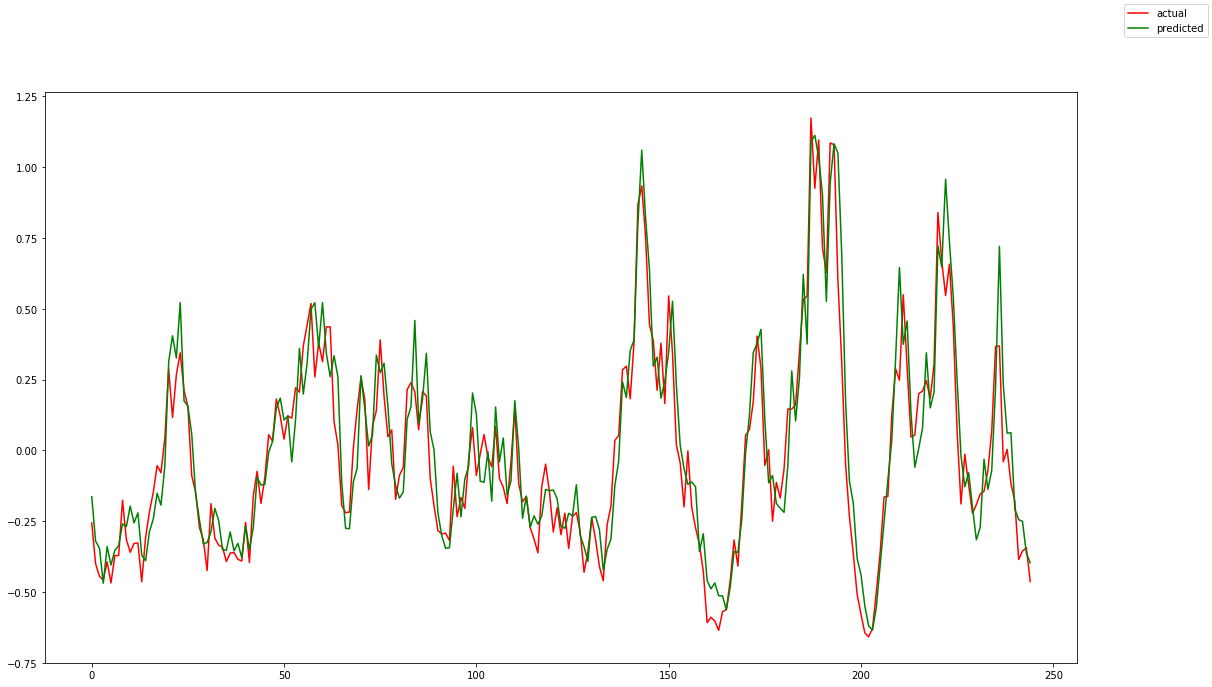

In [517]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
ax1.plot(actual, label="actual", color="red")
ax1.plot(predicted[0], label="predicted", color="green")
fig.legend(loc="best")
plt.show()

In [518]:
rmae = np.sqrt(((predicted-actual) ** 2).mean())

rmae

0.1246997001907796